In [30]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
#Getting the data
dfspam = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')
dfspam.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [32]:
dfspam.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],axis=1, inplace=True)
dfspam.columns = ['label','message']

In [33]:
dfspam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
dfspam.isnull().sum()#to check if there is any null value

label      0
message    0
dtype: int64

ham     4825
spam     747
Name: label, dtype: int64


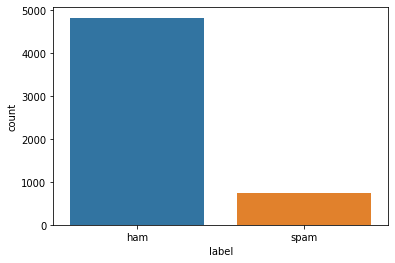

In [35]:
#count the spam and ham messages
print(dfspam['label'].value_counts())
sns.countplot(x='label', data=dfspam)

#Data Cleaning

In [36]:
# Remove the punctuation
import string

# Function to remove the punctuation
def remove_punct(text):
    newtext = ''
    for char in text:
        if char in string.punctuation:
            continue
        else:
            newtext += char
    return newtext

In [37]:
single_message = dfspam['message'][0]

print('message before removing the punctuation:')
print('\n')
print(single_message)
print('\n')
print('message after removing the punctuation:')
print()
print(remove_punct(single_message))

message before removing the punctuation:


Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


message after removing the punctuation:

Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat


In [38]:
dfspam['message'] = dfspam['message'].apply(remove_punct)

In [45]:
#converting all text to lowercase
def message_lowercase(text):
    lowercase_message=''
    for message in text:
        lowercase_message += message.lower()
    return lowercase_message

print(message_lowercase(dfspam['message'][0]))#single message to ensure

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat


In [46]:
dfspam['message'] = dfspam['message'].apply(message_lowercase)

In [47]:
dfspam.head()#all messages converted to lower case

,label,message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [49]:
# To perform stemming we will use Porterstemmer from nltk
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()

# Function to do the stemming
def stemming(text):
    text = text.split(' ') # to seperate the words
    text = [p_stemmer.stem(word) for word in text]
    
    return text

In [50]:
# test it on single message
single_message = dfspam['message'][4]

print('message before stemming:')
print('\n')
print(single_message)
print('\n')
print('message after stemming:')
print()
print(stemming(single_message))

message before stemming:


nah i dont think he goes to usf he lives around here though


message after stemming:

['nah', 'i', 'dont', 'think', 'he', 'goe', 'to', 'usf', 'he', 'live', 'around', 'here', 'though']


In [52]:
# Apply the above function to all the messages
dfspam['message'] = dfspam['message'].apply(stemming)

In [54]:
dfspam.head()

,label,message
0,ham,"[go, until, jurong, point, crazi, avail, onli,..."
1,ham,"[ok, lar, joke, wif, u, oni]"
2,spam,"[free, entri, in, 2, a, wkli, comp, to, win, f..."
3,ham,"[u, dun, say, so, earli, hor, u, c, alreadi, t..."
4,ham,"[nah, i, dont, think, he, goe, to, usf, he, li..."


In [56]:
# Stopwords can be is,are,the etc.
# use stopword method from nltk corpus library
from nltk.corpus import stopwords

# function to remove the stopword
def remove_stopwords(text):
    text = [word for word in text if word not in stopwords.words('english')]
    
    # converting the list back to text
    return ' '.join(text)

# test it on single message
single_message = dfspam['message'][4]

print('message before removing the stopwords:')
print('\n')
print(single_message)
print('\n')
print('message after removing the stopwords:')
print()
print(remove_stopwords(single_message))

message before removing the stopwords:


['nah', 'i', 'dont', 'think', 'he', 'goe', 'to', 'usf', 'he', 'live', 'around', 'here', 'though']


message after removing the stopwords:

nah dont think goe usf live around though


In [57]:
# Apply the above function to all the messages
dfspam['message'] = dfspam['message'].apply(remove_stopwords)

In [27]:
dfspam.head()

,label,message
0,ham,G u n l j u r n g p n c r z A v l b ...
1,ham,O k l r J k n g w f u n
2,spam,F r e e e n r n 2 w k l c p w ...
3,ham,U u n e r l h r U c l r e h ...
4,ham,N h I n h n k h e g e u f h e ...


In [58]:
#creating bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(dfspam['message']).toarray()
y = dfspam.iloc[:,0].values

In [59]:
# Libraries needed
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [60]:
# Let's divide the data into X and y

X = dfspam['message']
y = dfspam['label']

# Let's perform the one hot encoding for y 
encoded_y = pd.get_dummies(y,drop_first=True).values.reshape(-1,)

In [61]:
# Let's divide the data into train and test set. We will take 25% of data as test set
X_train,X_test,y_train,y_test = train_test_split(X,encoded_y,test_size=0.25)

In [62]:
naive = Pipeline([
    ('vector',TfidfVectorizer()),
    ('classifier',MultinomialNB())
])

In [63]:
naive.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vector',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [64]:
predict_naive = naive.predict(X_test)

In [65]:
acc_naive = accuracy_score(y_test,predict_naive)
print(f"Accuracy of naive model is {np.round(acc_naive*100,2)}%")
print('\n')
print(classification_report(y_test,predict_naive))
print('\n')

Accuracy of naive model is 96.63%


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1216
           1       1.00      0.73      0.85       177

    accuracy                           0.97      1393
   macro avg       0.98      0.87      0.91      1393
weighted avg       0.97      0.97      0.96      1393



